In [118]:
import numpy as np
import scipy as sp
import scipy.stats as stats

import matplotlib.pyplot as plt
%matplotlib inline

In [119]:
import torch 
import torchvision


## Zadanie 1

Wytrenuj sieć na danych  z pliku `reg_data_noise.npy`. 

In [120]:
data = np.load('reg_data_noise.npy')
print(data.size)

400


In [121]:
xs = data[:,0]
ys = data[:,1]

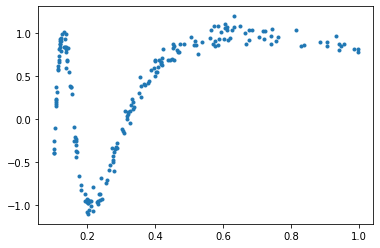

In [122]:
plt.plot(xs,ys,'.');

In [123]:
model = torch.nn.Sequential(torch.nn.Linear(1,512),
                    torch.nn.ReLU(), torch.nn.Linear(512,1))

In [124]:
t_xs = torch.from_numpy(xs).view(-1,1)
t_ys = torch.from_numpy(ys).view(-1,1)

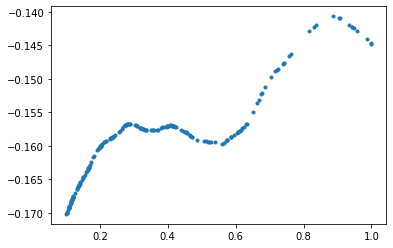

In [125]:
t_out = model(t_xs)

plt.plot(xs, t_out.data.view(-1).numpy(),'.')

In [126]:
dataset = torch.utils.data.TensorDataset(t_xs, t_ys)
(train_set, valid_set) = torch.utils.data.random_split(dataset,(160,40))

In [127]:
size = 80
print(size)
train_loader = torch.utils.data.DataLoader(train_set,batch_size=size,shuffle=True)

80


In [132]:
optimizer = torch.optim.SGD(model.parameters(),lr =0.1)
loss_func = torch.nn.MSELoss()

err_train=[]
err_valid=[]
for epoch in range(10000):    
    for datum in train_loader:
        optimizer.zero_grad()
        (features,target) = datum
        pred = model(features)
        loss = loss_func(pred, target)
        loss.backward()
        optimizer.step()
    
    with torch.no_grad():
        vpred  = model(valid_set[:][0])
        vloss  = loss_func(vpred,valid_set[:][1])
        err_valid.append(vloss)
        pred  = model(train_set[:][0])
        loss  = loss_func(pred,train_set[:][1])
        err_train.append(loss)
    if epoch%1000 == 0:
        print("epoch %d %f %f " % (epoch, loss, vloss))   

epoch 0 0.078727 0.080900 
epoch 1000 0.063812 0.053966 
epoch 2000 0.053258 0.045817 
epoch 3000 0.050428 0.040004 
epoch 4000 0.028377 0.026710 
epoch 5000 0.028662 0.028742 
epoch 6000 0.047589 0.045997 
epoch 7000 0.117758 0.108460 
epoch 8000 0.030024 0.027326 
epoch 9000 0.018386 0.019410 


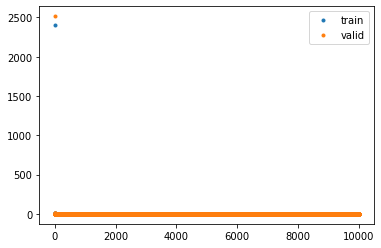

In [129]:
plt.plot(err_train, '.', label='train')
plt.plot(err_valid, '.', label='valid')
plt.legend()

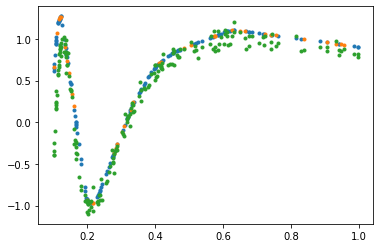

In [135]:
t_out_train = model(train_set[:][0])
plt.plot(train_set[:][0].data.numpy(), t_out_train.data.view(-1).numpy(),'.')
t_out_valid = model(valid_set[:][0])
plt.plot(valid_set[:][0].data.numpy(), t_out_valid.data.view(-1).numpy(),'.')
plt.plot(xs,ys,'.');

In [143]:
torch.save(model, "model.pt")